In [ ]:
"""
1.first read the sequence file and convert into dictionary- species with sequence
Should I use class (?)
2.To generate the plot: 
2.1 Species' name(not for id) in plot left side
2.2 Sequence on the right side
2.3 Compare sequence (column) for the most common same one use one color
2.4 For other not the same amino acid with the most common one use other colors, each color dif
2.5 Go through each column and generate the plot
2.6 Some settings for plot
3. Under the plot,
3.1 Generate the Web Logo 
4. Split the protein sequence 
4.1 Compare Again and generate the table kind of result to show the similarity (local alignment)
"""

In [61]:
#1) pip install biopython
#1) pip install pymsaviz

import os
from Bio.Align.Applications import ClustalwCommandline
from Bio import AlignIO

# input_file
input_file = "wnt3a.fasta"
output_file = "wnt3a.aln"

#1) conda install clustalw -c bioconda
#2) which clustalw -> to get path of clustalw
clustalw_exe = "/home/yeongjun.kim/anaconda3/envs/ASMSA/bin/clustalw"  # ClustalW file path

# ClustalW command
clustalw_cline = ClustalwCommandline(clustalw_exe, infile=input_file, outfile=output_file)
assert os.path.isfile(clustalw_exe), "ClustalW executable not found"

# ClustalW
stdout, stderr = clustalw_cline()

# read result file
alignment = AlignIO.read(output_file, "clustal")

# print alignment result
print(alignment)


Alignment with 12 rows and 430 columns
MAPLGYLLVLCS-----------LKQALGSYPIWWS--------...--- NP_033548.1
MAPLGYLLVLCS-----------LKQALGSYPIWWS--------...--- NP_001401278.1
MAPLGYFLLLCS-----------LKQALGSYPIWWS--------...--- NP_149122.1
MAPLGYFLLLCS-----------LKQALGSYPIWWS--------...RER XP_063647092.1
MAPLGYFLLLCS-----------LKQALGSYPIWWS--------...--- XP_001085785.1
MAPLGYFMFLYG-----------LKQALGSYPIWWS--------...--- XP_027825128.1
MAPLGYFIFLYG-----------LKQALGNYPIWWS--------...--- XP_024851160.1
MAPLGYFIFLYG-----------LKQALGSYPIWWS--------...--- XP_003123669.1
MAPLGYFLFLCG-----------LKQALGSYPIWWS--------...--- XP_023474106.1
MKSFCSEVVAKSRLGLKQWGWCGWTPMGSAWKKWISEQRSLLEL...--- NP_990006.3
MGCFGYLLLIIG-----------LHQVLATYPIWWS--------...--- NP_001079343.1
MIYLGYFLFLFCG----------LTRVMASYPIWWS--------...--- NP_001007186.1


In [63]:
from Bio import AlignIO

def get_amino_acid_position(alignment, sequence_id, position):
    
    for record in alignment:
        if record.id == sequence_id:
            original_sequence = str(record.seq)
            break
    else:
        raise ValueError(f"Sequence ID {sequence_id} not found in the MSA file.")

    count_non_gap = 0
    adjusted_position = 0
    while count_non_gap < position:
        if original_sequence[adjusted_position] != "-":
            count_non_gap +=1
        adjusted_position += 1            

    amino_acid = original_sequence[adjusted_position - 1]
    return adjusted_position, amino_acid

alignment = AlignIO.read(output_file, "clustal")
sequence_id = "NP_149122.1"  
position = 13  

adjusted_position, amino_acid = get_amino_acid_position(alignment, sequence_id, position)
print(f"Adjusted position: {adjusted_position}, Amino acid: {amino_acid}")


Adjusted position: 24, Amino acid: L


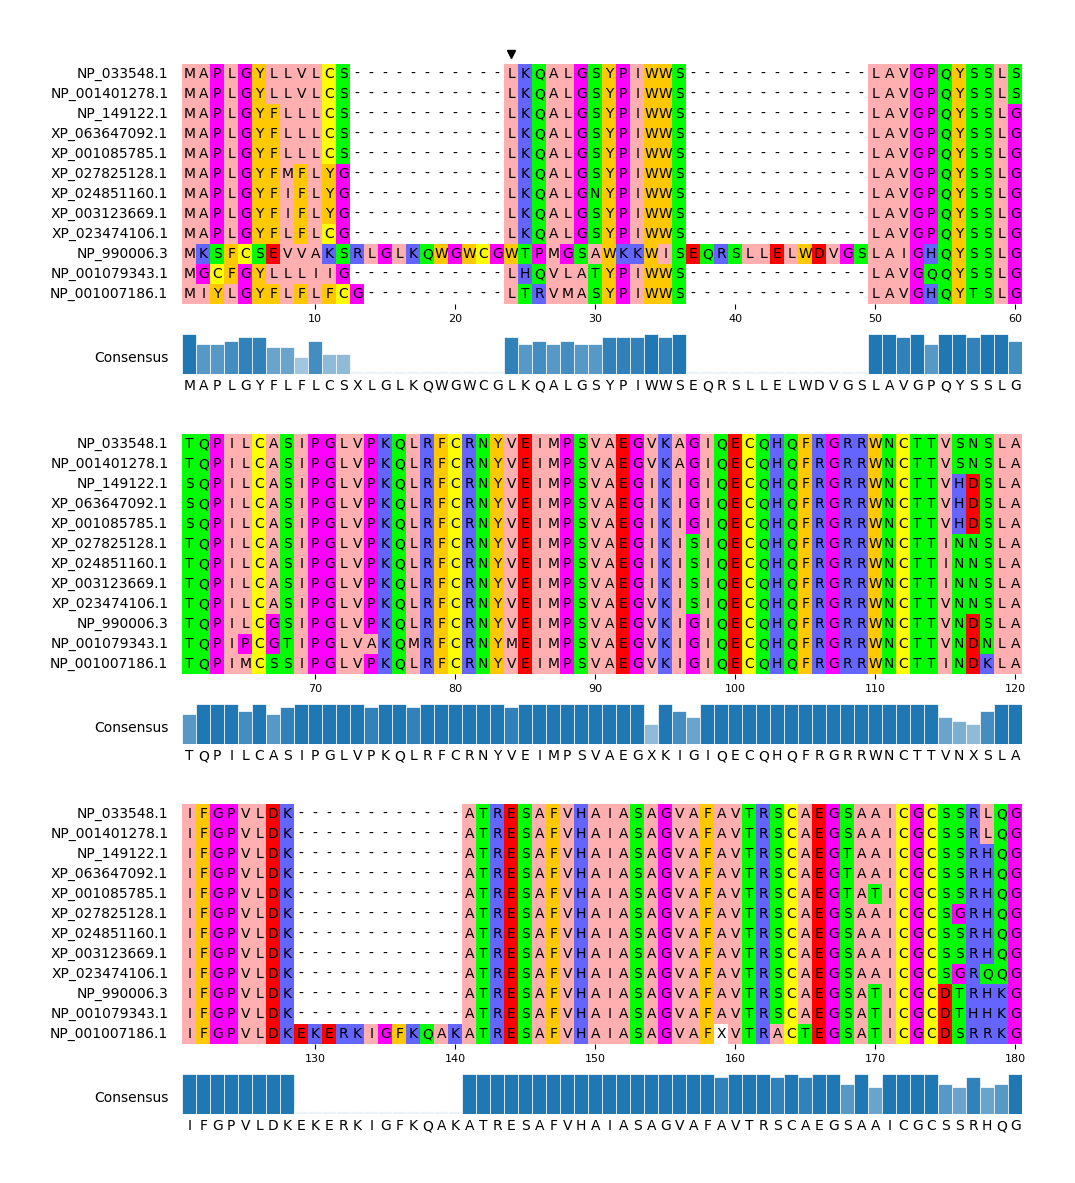

In [68]:
from pymsaviz import MsaViz, get_msa_testdata

#msa_file = get_msa_testdata("MRGPRG.fa")
mv = MsaViz(alignment, end=180, wrap_length=60, show_consensus=True)

# Extract MSA positions less than 50% consensus identity
pos_ident_less_than_50 = []
ident_list = mv._get_consensus_identity_list()
for pos, ident in enumerate(ident_list, 1):
    if ident <= 50:
        pos_ident_less_than_50.append(pos)

# Add markers
mv.add_markers([get_amino_acid_position(alignment, "NP_149122.1", 13)[0]])
# mv.add_markers([10, 20], color="orange", marker="o")
# mv.add_markers([30, (40, 50), 55], color="green", marker="+")
# mv.add_markers(pos_ident_less_than_50, marker="x", color="blue")
# # Add text annotations
# mv.add_text_annotation((76, 102), "Gap Region", text_color="red", range_color="red")
# mv.add_text_annotation((112, 123), "Gap Region", text_color="green", range_color="green")

mv.savefig("api_example03.png")


from IPython.display import Image, display
display(Image(filename="api_example03.png"))

In [1]:
# 1.first read the sequence file and convert into dictionary- species with sequence
my_dict = {}

f = open("wnt3a.fasta","r")
def read_file_into_dic (filename):
    
    lines = f.readlines()
    for line in lines:
        if line.startswith(">"):
            spec_name_only = line.split('[')[-1].split(']')[0].strip()
            sequences = ''
        else:
            sequences += line.strip()
            my_dict[spec_name_only] = sequences
    return my_dict
read_file_into_dic(f)

    

{'Mus musculus': 'MAPLGYLLVLCSLKQALGSYPIWWSLAVGPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGWKWGGCSEDIEFGGMVSREFADARENRPDARSAMNRHNNEAGRQAIASHMHLKCKCHGLSGSCEVKTCWWSQPDFRTIGDFLKDKYDSASEMVVEKHRESRGWVETLRPRYTYFKVPTERDLVYYEASPNFCEPNPETGSFGTRDRTCNVSSHGIDGCDLLCCGRGHNARTERRREKCHCVFHWCCYVSCQECTRVYDVHTCK',
 'Homo sapiens': 'MAPLGYFLLLCSLKQALGSYPIWWSLAVGPQYSSLGSQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKIGIQECQHQFRGRRWNCTTVHDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGTAAICGCSSRHQGSPGKGWKWGGCSEDIEFGGMVSREFADARENRPDARSAMNRHNNEAGRQAIASHMHLKCKCHGLSGSCEVKTCWWSQPDFRAIGDFLKDKYDSASEMVVEKHRESRGWVETLRPRYTYFKVPTERDLVYYEASPNFCEPNPETGSFGTRDRTCNVSSHGIDGCDLLCCGRGHNARAERRREKCRCVFHWCCYVSCQECTRVYDVHTCK',
 'Rattus norvegicus': 'MAPLGYLLVLCSLKQALGSYPIWWSLAVGPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGWKWGGCSEDIEFGGMVSREFADARENRPDARSAMNRHNNEAGRQAIASHMHLKCKCHGLSGSCEVKTCWWSQPDFRTIGDFL

In [2]:
extracted_sequences = {species: sequence[28:150] for species, sequence in my_dict.items()}
extracted_sequences

{'Mus musculus': 'GPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGW',
 'Homo sapiens': 'GPQYSSLGSQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKIGIQECQHQFRGRRWNCTTVHDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGTAAICGCSSRHQGSPGKGW',
 'Rattus norvegicus': 'GPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGW',
 'Danio rerio': 'VGHQYTSLGTQPIMCSSIPGLVPKQLRFCRNYVEIMPSVAEGVKIGIQECQHQFRGRRWNCTTINDKLAIFGPVLDKEKERKIGFKQAKATRESAFVHAIASAGVAFXVTRACTEGSATICG',
 'Gallus gallus': 'SAWKKWISEQRSLLELWDVGSLAIGHQYSSLGTQPILCGSIPGLVPKQLRFCRNYVEIMPSVAEGVKIGIQECQHQFRGRRWNCTTVNDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTR',
 'Xenopus laevis': 'GQQYSSLGTQPIPCGTIPGLVAKQMRFCRNYMEIMPSVAEGVKIGIQECQHQFRGRRWNCTTVNDNLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSATICGCDTHHKGPPGEGW',
 'Ovis aries': 'GPQYSSLGTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKISIQECQHQFRGRRWNCTTINNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSGRHQGSPG

In [8]:
values = list(extracted_sequences.values())
print(values)
type(values)
# value is a list, list has two strings rn

    # seq1=values[0]
    # seq1 is whole string
    # seq2=values[1]
    # seq2 is whole string
    
aminoacid_list = [list(seq) for seq in values]
print(aminoacid_list[0][2])


    



['GPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGW', 'GPQYSSLGSQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKIGIQECQHQFRGRRWNCTTVHDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGTAAICGCSSRHQGSPGKGW', 'GPQYSSLSTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGVKAGIQECQHQFRGRRWNCTTVSNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRLQGSPGEGW', 'VGHQYTSLGTQPIMCSSIPGLVPKQLRFCRNYVEIMPSVAEGVKIGIQECQHQFRGRRWNCTTINDKLAIFGPVLDKEKERKIGFKQAKATRESAFVHAIASAGVAFXVTRACTEGSATICG', 'SAWKKWISEQRSLLELWDVGSLAIGHQYSSLGTQPILCGSIPGLVPKQLRFCRNYVEIMPSVAEGVKIGIQECQHQFRGRRWNCTTVNDSLAIFGPVLDKATRESAFVHAIASAGVAFAVTR', 'GQQYSSLGTQPIPCGTIPGLVAKQMRFCRNYMEIMPSVAEGVKIGIQECQHQFRGRRWNCTTVNDNLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSATICGCDTHHKGPPGEGW', 'GPQYSSLGTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKISIQECQHQFRGRRWNCTTINNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSGRHQGSPGEGW', 'GPQYSSLGTQPILCASIPGLVPKQLRFCRNYVEIMPSVAEGIKISIQECQHQFRGRRWNCTTINNSLAIFGPVLDKATRESAFVHAIASAGVAFAVTRSCAEGSAAICGCSSRHQG

In [11]:
import matplotlib.pyplot as plt
import numpy as np


aa_to_color = {
    'A': '#FF0000',  
    'C': '#00FF00',  
    'D': '#0000FF',  
    'E': '#FFFF00',  
    'F': '#FF00FF',  
    'G': '#00FFFF',  
    'H': '#800000',  
    'I': '#808000',  
    'K': '#008000',  
    'L': '#800080',  
    'M': '#008080',  
    'N': '#000080',  
    'P': '#FFA500',  
    'Q': '#A52A2A', 
    'R': '#808080',  
    'S': '#C0C0C0',  
    'T': '#FFFFFF',  
    'V': '#000000', 
    'W': '#FF6347',
    'X': '#FF6347',  
    'Y': '#4682B4',  
    '-': '#D3D3D3',  
}


aa_matrix = np.array(amino_acid_list)
color_matrix = np.array([[aa_to_color[aa] for aa in seq] for seq in amino_acid_list])


fig, ax = plt.subplots(figsize=(len(aminoacid_list[0]) * 2, len(amino_acid_list) * 2))


for i in range(len(aminoacid_list)):
    for j in range(len(aminoacid_list[0])):
        ax.add_patch(plt.Rectangle((j, i), 1, 1, color=color_matrix[i][j]))
        ax.text(j + 0.5, i + 0.5, aa_matrix[i, j], ha='center', va='center', fontsize=6)


ax.set_yticks(np.arange(len(aminoacid_list)) + 0.5)
ax.set_yticklabels([f'Seq {i+1}' for i in range(len(aminoacid_list))], fontsize=10)


ax.set_xticks(np.arange(len(aminoacid_list[0])) + 0.5)
ax.set_xticklabels(np.arange(1, len(aminoacid_list[0]) + 1), fontsize=6)


ax.set_xlim(0, len(aminoacid_list[0]))
ax.set_ylim(0, len(aminoacid_list))


ax.set_xlabel('Position')
ax.set_ylabel('Sequence')
plt.title('MSA Visualization')


ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=True)
ax.grid(False)


plt.tight_layout()


plt.show()
